# ***Marketplace items - Model Training***
---

In [70]:
import pandas as pd
import numpy as np

### **Revisamos las columnas restantes del Dataset**

In [81]:
df = pd.read_csv("../data/MLA_100k_clean.csv")
df

,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,initial_quantity,available_quantity,free_shipping,mode,local_pick_up
0,new,bronze,80.0,buy_it_now,True,False,active,1,1,False,not_specified,True
1,used,silver,2650.0,buy_it_now,True,False,active,1,1,False,me2,True
2,used,bronze,60.0,buy_it_now,True,False,active,1,1,False,me2,True
3,new,silver,580.0,buy_it_now,True,False,active,1,1,False,me2,True
4,used,bronze,30.0,buy_it_now,True,False,active,1,1,False,not_specified,True
...,...,...,...,...,...,...,...,...,...,...,...,...
99367,used,free,30.0,buy_it_now,True,False,active,1,1,False,me2,True
99368,new,bronze,239.0,buy_it_now,True,False,active,5,5,False,not_specified,False
99369,used,bronze,600.0,buy_it_now,True,False,active,1,1,False,me2,False
99370,used,bronze,50.0,buy_it_now,True,False,active,1,1,False,me2,True


In [82]:
original_col = df.columns
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode',
       'accepts_mercadopago', 'automatic_relist', 'status', 'initial_quantity',
       'available_quantity', 'free_shipping', 'mode', 'local_pick_up'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99372 entries, 0 to 99371
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            99372 non-null  object 
 1   listing_type_id      99372 non-null  object 
 2   price                99372 non-null  float64
 3   buying_mode          99372 non-null  object 
 4   accepts_mercadopago  99372 non-null  bool   
 5   automatic_relist     99372 non-null  bool   
 6   status               99372 non-null  object 
 7   initial_quantity     99372 non-null  int64  
 8   available_quantity   99372 non-null  int64  
 9   free_shipping        99372 non-null  bool   
 10  mode                 99372 non-null  object 
 11  local_pick_up        99372 non-null  bool   
dtypes: bool(4), float64(1), int64(2), object(5)
memory usage: 6.4+ MB


### **Librerias para creación de los modelos**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

**Convertir 'condition' a valores numéricos**:

- Utiliza **LabelEncoder** para transformar la columna `'condition'` (que probablemente tiene valores como `"nuevo"` o `"usado"`) a valores numéricos.
- Asigna `0` a `"usado"` y `1` a `"nuevo"` para que el modelo pueda trabajar con ellos.  

**Aplicar One-Hot Encoding a columnas categóricas**:
- El código aplica **One-Hot Encoding** a las columnas `'listing_type_id'`, `'buying_mode'`, `'status'` y `'mode'`.
- **One-Hot Encoding** transforma cada valor único de estas columnas en una nueva columna binaria (0 o 1), lo que permite que los modelos numéricos trabajen con estas variables categóricas.

In [75]:
le = LabelEncoder()
df['condition'] = le.fit_transform(df['condition'])  # 0 = usado, 1 = nuevo

df = pd.get_dummies(df, columns=['listing_type_id', 'buying_mode', 'status', 'mode'])

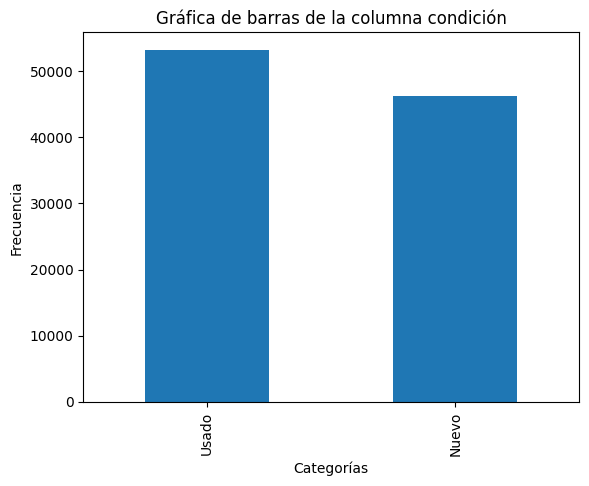

In [76]:
conteo_valores = df['condition'].value_counts()

conteo_valores.plot(kind='bar')

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfica de barras de la columna condición')

plt.xticks(ticks=[0, 1], labels=['Usado', 'Nuevo'])

plt.show()

- **Separación de características y objetivo**:
    - `X` contiene las características (todas las columnas excepto `'condition'`).
    - `y` es la columna objetivo `'condition'`, que contiene los valores que se quieren predecir (nuevo/usado).
- **División de los datos**:
    - Se divide el conjunto de datos en entrenamiento (80%) y prueba (20%) utilizando `train_test_split`.
- **Definición de los modelos**:
    - Se crean tres modelos: **Regresión Logística**, **Random Forest** y **Árbol de Decisión**.
- **Entrenamiento y evaluación**:
    - Para cada modelo (logístico, Random Forest y árbol de decisión), el código:
        - Entrena el modelo con los datos de entrenamiento (`X_train`, `y_train`).
        - Realiza predicciones sobre los datos de prueba (`X_test`).
        - Calcula e imprime las métricas: **Accuracy**, **Precision**, **Recall** y **F1-Score** para evaluar el rendimiento de cada modelo.

### **Entrenamiento y pruebas**

In [77]:
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos a probar
estimators = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Ejecutar los modelos y evaluar el rendimiento
for name, estimator in estimators.items():
    # Entrenar el modelo
    estimator.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = estimator.predict(X_test)
    
    print(f"\n========== {name} ==========")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | Precision: {precision_score(y_test, y_pred):.4f} | Recall: {recall_score(y_test, y_pred):.4f} | F1-Score: {f1_score(y_test, y_pred):.4f}")


========== Logistic Regression ==========
Accuracy: 0.7145 | Precision: 0.6989 | Recall: 0.6763 | F1-Score: 0.6874

========== Random Forest ==========
Accuracy: 0.8242 | Precision: 0.7779 | Recall: 0.8694 | F1-Score: 0.8211

========== Decision Tree ==========
Accuracy: 0.8208 | Precision: 0.7790 | Recall: 0.8572 | F1-Score: 0.8162


Se elige el modelo **Random Forest**, tiene el mejor rendimiento global, con alta accuracy, precision, recall y F1-Score. Estas métricas indican que es un modelo confiable para predecir correctamente si es nuevo o usado el producto.

### **Graficación de las columnas mas importantes delo modelo Random Forest**

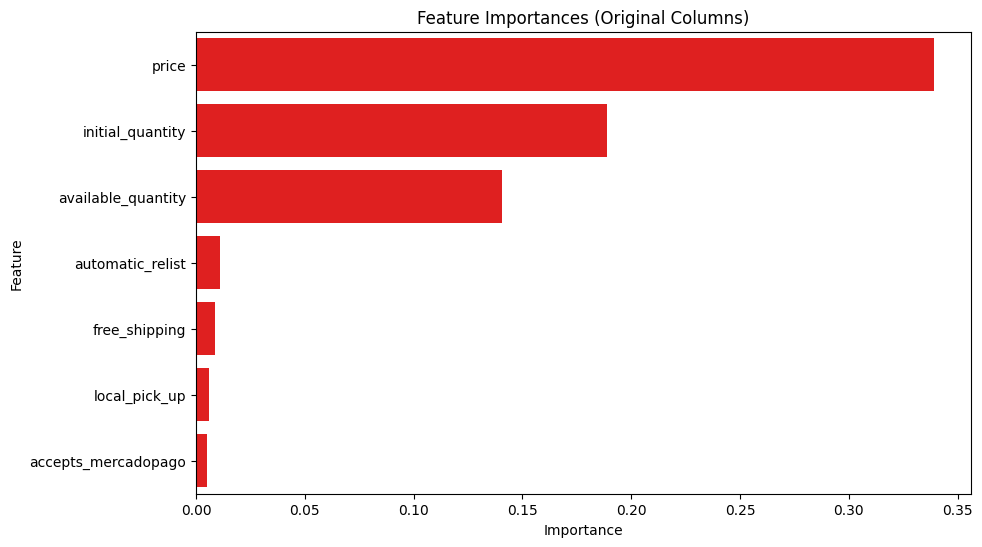

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Filtrar el DataFrame para solo las columnas originales
feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(original_col)]

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='red')
plt.title('Feature Importances (Original Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Guardado del modelo en PKL

In [79]:
import joblib

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

joblib.dump(rf, '../model/random_forest.pkl')
print("Modelo guardado exitosamente")

Modelo guardado exitosamente
